In [185]:
import numpy as np
import sys
import empymod

sys.path.append('../')

from emulatte.model import earth
from emulatte.source.loop import HCL

In [186]:
def pos(data):
    """Return positive data; set negative data to NaN."""
    return np.array([x if x > 0 else np.nan for x in data])


def neg(data):
    """Return -negative data; set positive data to NaN."""
    return np.array([-x if x < 0 else np.nan for x in data])

In [187]:
#%%timeit
src = [0,0,0]
rec = [0,0,0]
thicks = []
res = [100]
chg = [0.5]
tau = [1e-2]
fqc = [0.7]


freq = np.logspace(-1, 6, 601)
model1 = earth.PeltonIPEM1D(thicks)
model2 = earth.QuasiStaticEM1D(thicks)
loop = HCL(1, 50)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model1.set_params(res, chg, tau, fqc)
model2.set_params(res)
model1.set_source(loop, src)
model2.set_source(loop, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model1.set_filter(hankel_filter='key201')
model2.set_filter(hankel_filter='key201')
EMFIP = model1.field("H", "z", rec, freq)
EMFEM = model2.field("H", "z", rec, freq)
#emulatte

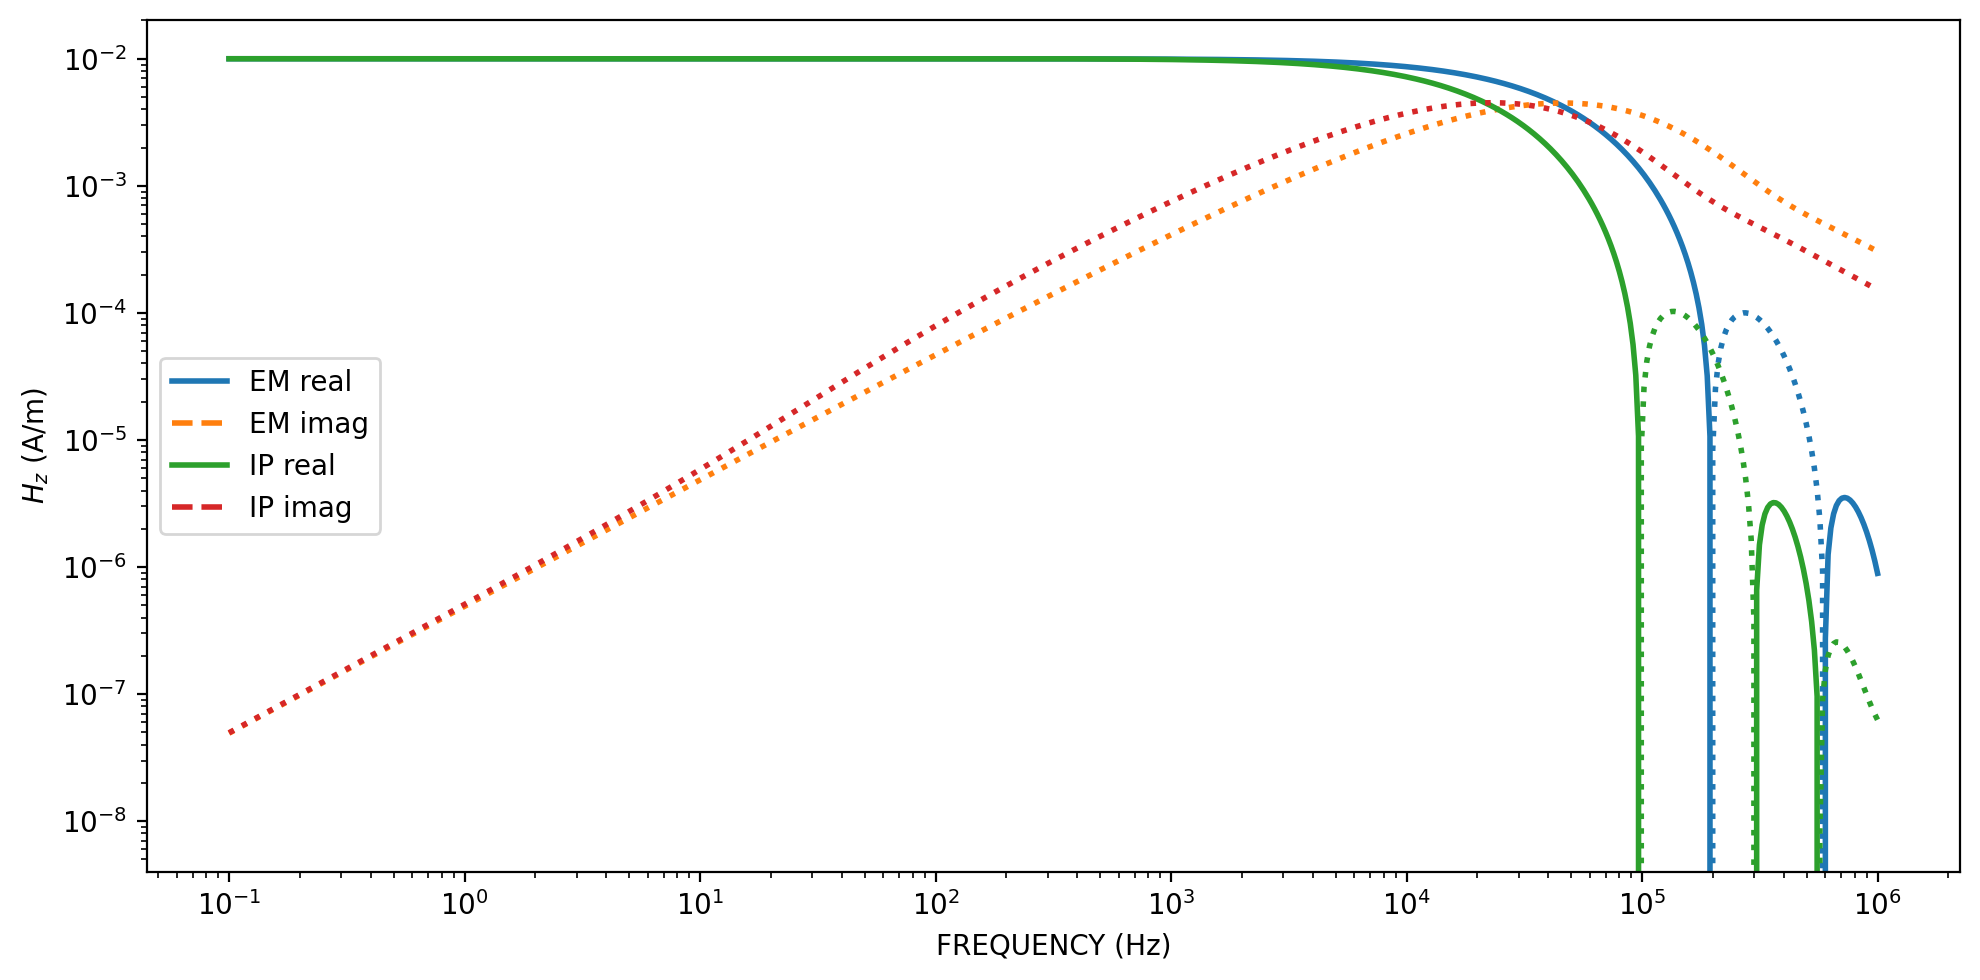

In [188]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(freq, EMFEM.real, "C0-", label='EM real', linewidth=2)
ax.plot(freq, -EMFEM.real, "C0:", linewidth=2)
ax.plot(freq, EMFEM.imag, "C1--", label='EM imag', linewidth=2)
ax.plot(freq, -EMFEM.imag, "C1:", linewidth=2)

ax.plot(freq, EMFIP.real, "C2-", label='IP real', linewidth=2)
ax.plot(freq, -EMFIP.real, "C2:", linewidth=2)
ax.plot(freq, EMFIP.imag, "C3--", label='IP imag', linewidth=2)
ax.plot(freq, -EMFIP.imag, "C3:", linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1e-1, 1e5])
#ax.set_ylim([1e-12, 1e-10])
ax.set_xlabel('FREQUENCY (Hz)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()

plt.tight_layout()

plt.show()

In [199]:
%%timeit
src = [0,0,-10]
rec = [20,0,1]
thicks = []
res = [1]
chg = [0.3]
tau = [0.001]
fqc = [0.1]


time = np.logspace(-10, 1, 601)
model1 = earth.PeltonIPEM1D(thicks)

loop = HCL(1, 10, ontime=-1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model1.set_params(res, chg, tau, fqc)
model1.set_source(loop, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model1.set_filter(hankel_filter='key201')
JIP = model1.field("JIP", "y", rec, time)
JEM = model1.field("JEM", "y", rec, time)
JT =  model1.field("J", "y", rec, time)
#emulatte

250 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


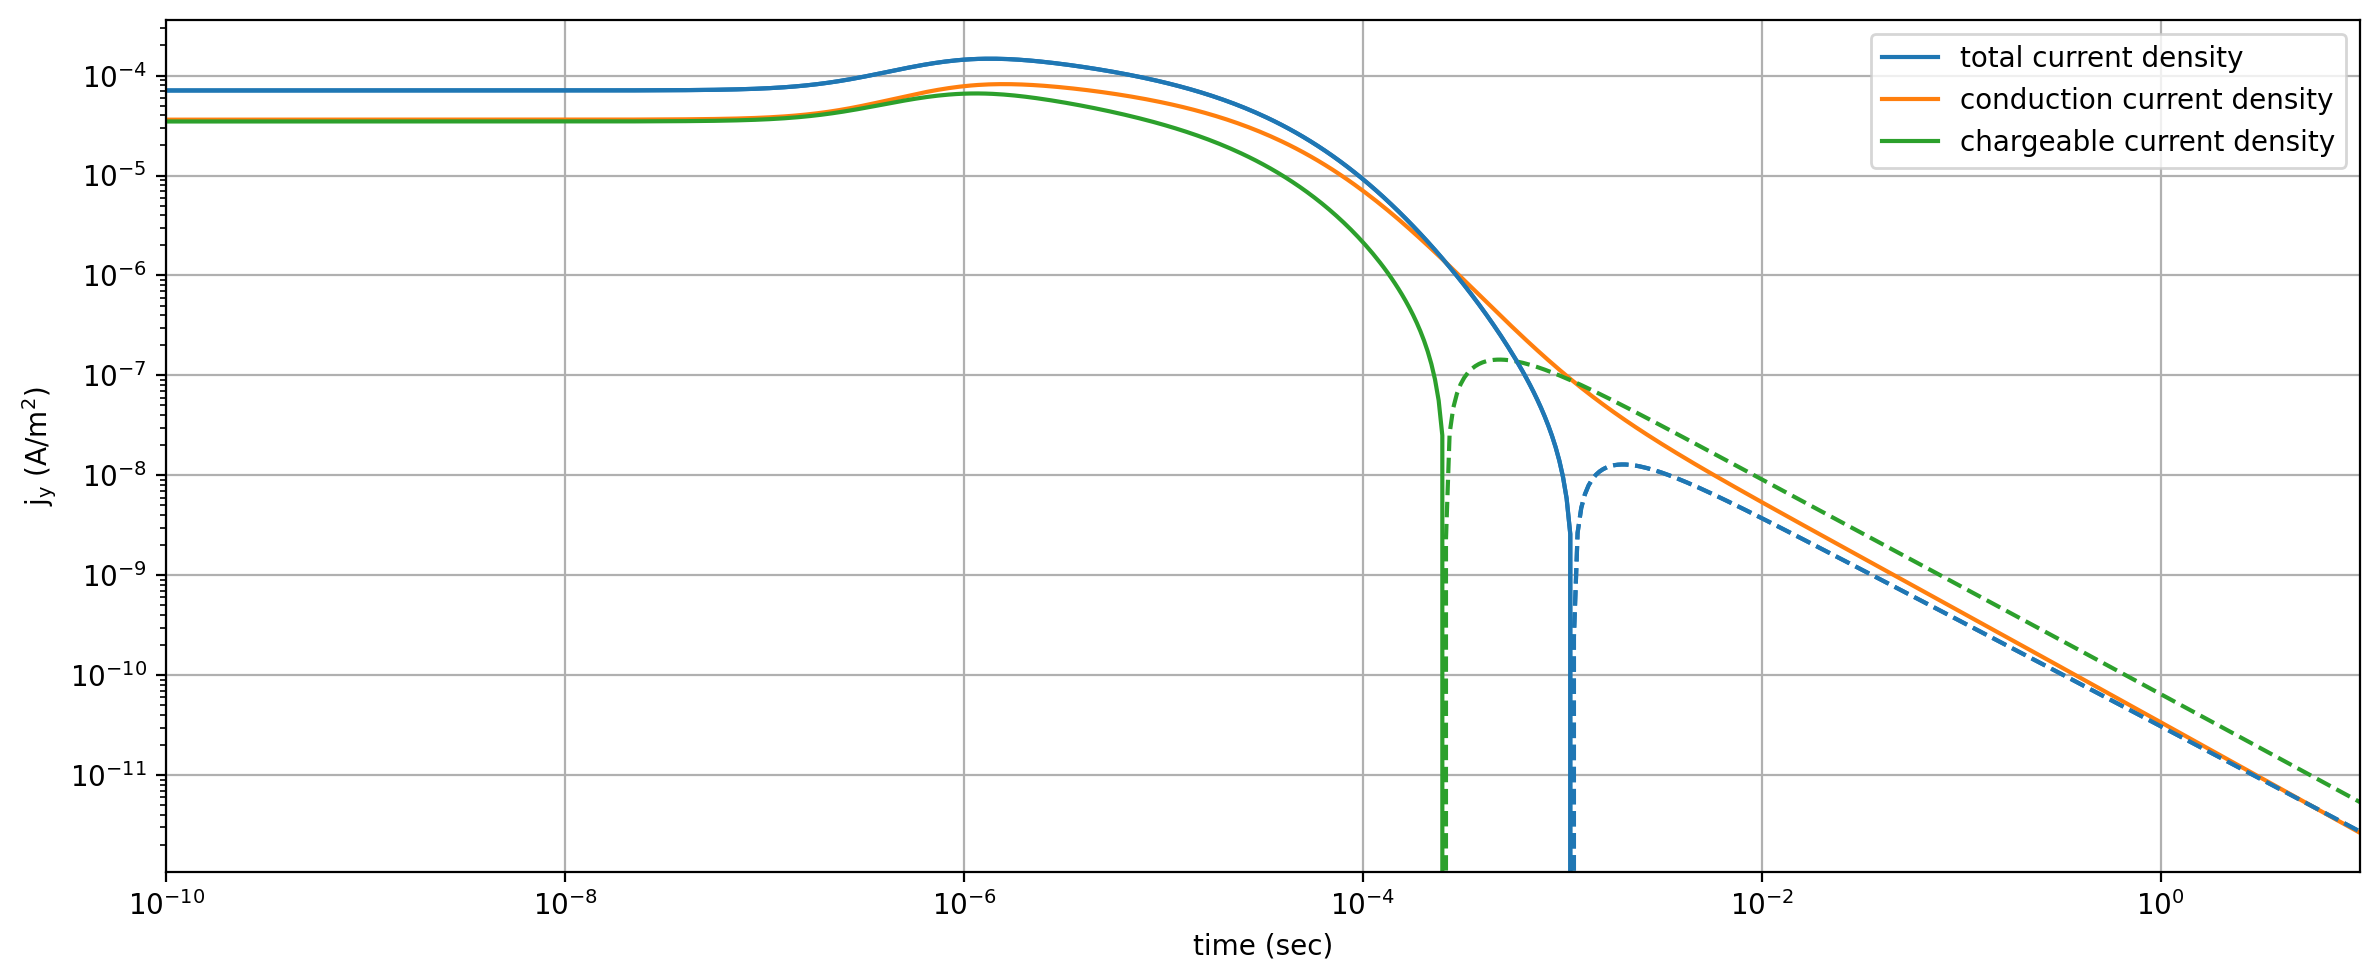

In [196]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)

ax.plot(time, JT, "C0-", label='total current density')
ax.plot(time, -JT, "C0--")
ax.plot(time, JEM, "C1-", label='conduction current density')
ax.plot(time, -JEM, "C1--")
ax.plot(time, JIP, "C2-", label='chargeable current density')
ax.plot(time, -JIP, "C2--")
ax.plot(time, JT, "C0-")
ax.plot(time, -JT, "C0--")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-10, 1e1])
#ax.ylim([1e-12, 1e-6])
ax.set_xlabel('time (sec)')
ax.set_ylabel('$\mathrm{j_y}$ (A/$\mathrm{m^2}$)')
ax.legend()
ax.grid()
plt.tight_layout()

plt.show()

In [197]:
#%%timeit
src = [0,0,-40]
rec = [0,0,-40]
thicks = []

time = np.logspace(-10, 1, 601)
model1 = earth.PeltonIPEM1D(thicks)

loop = HCL(1, 10, ontime=-1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model1.set_params(res, chg, tau, fqc)
model1.set_source(loop, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model1.set_filter(hankel_filter='key201')
JIP = model1.field("H", "z", rec, time)
JEM = model1.field("H", "z", rec, time)
JT =  model1.field("H", "z", rec, time)

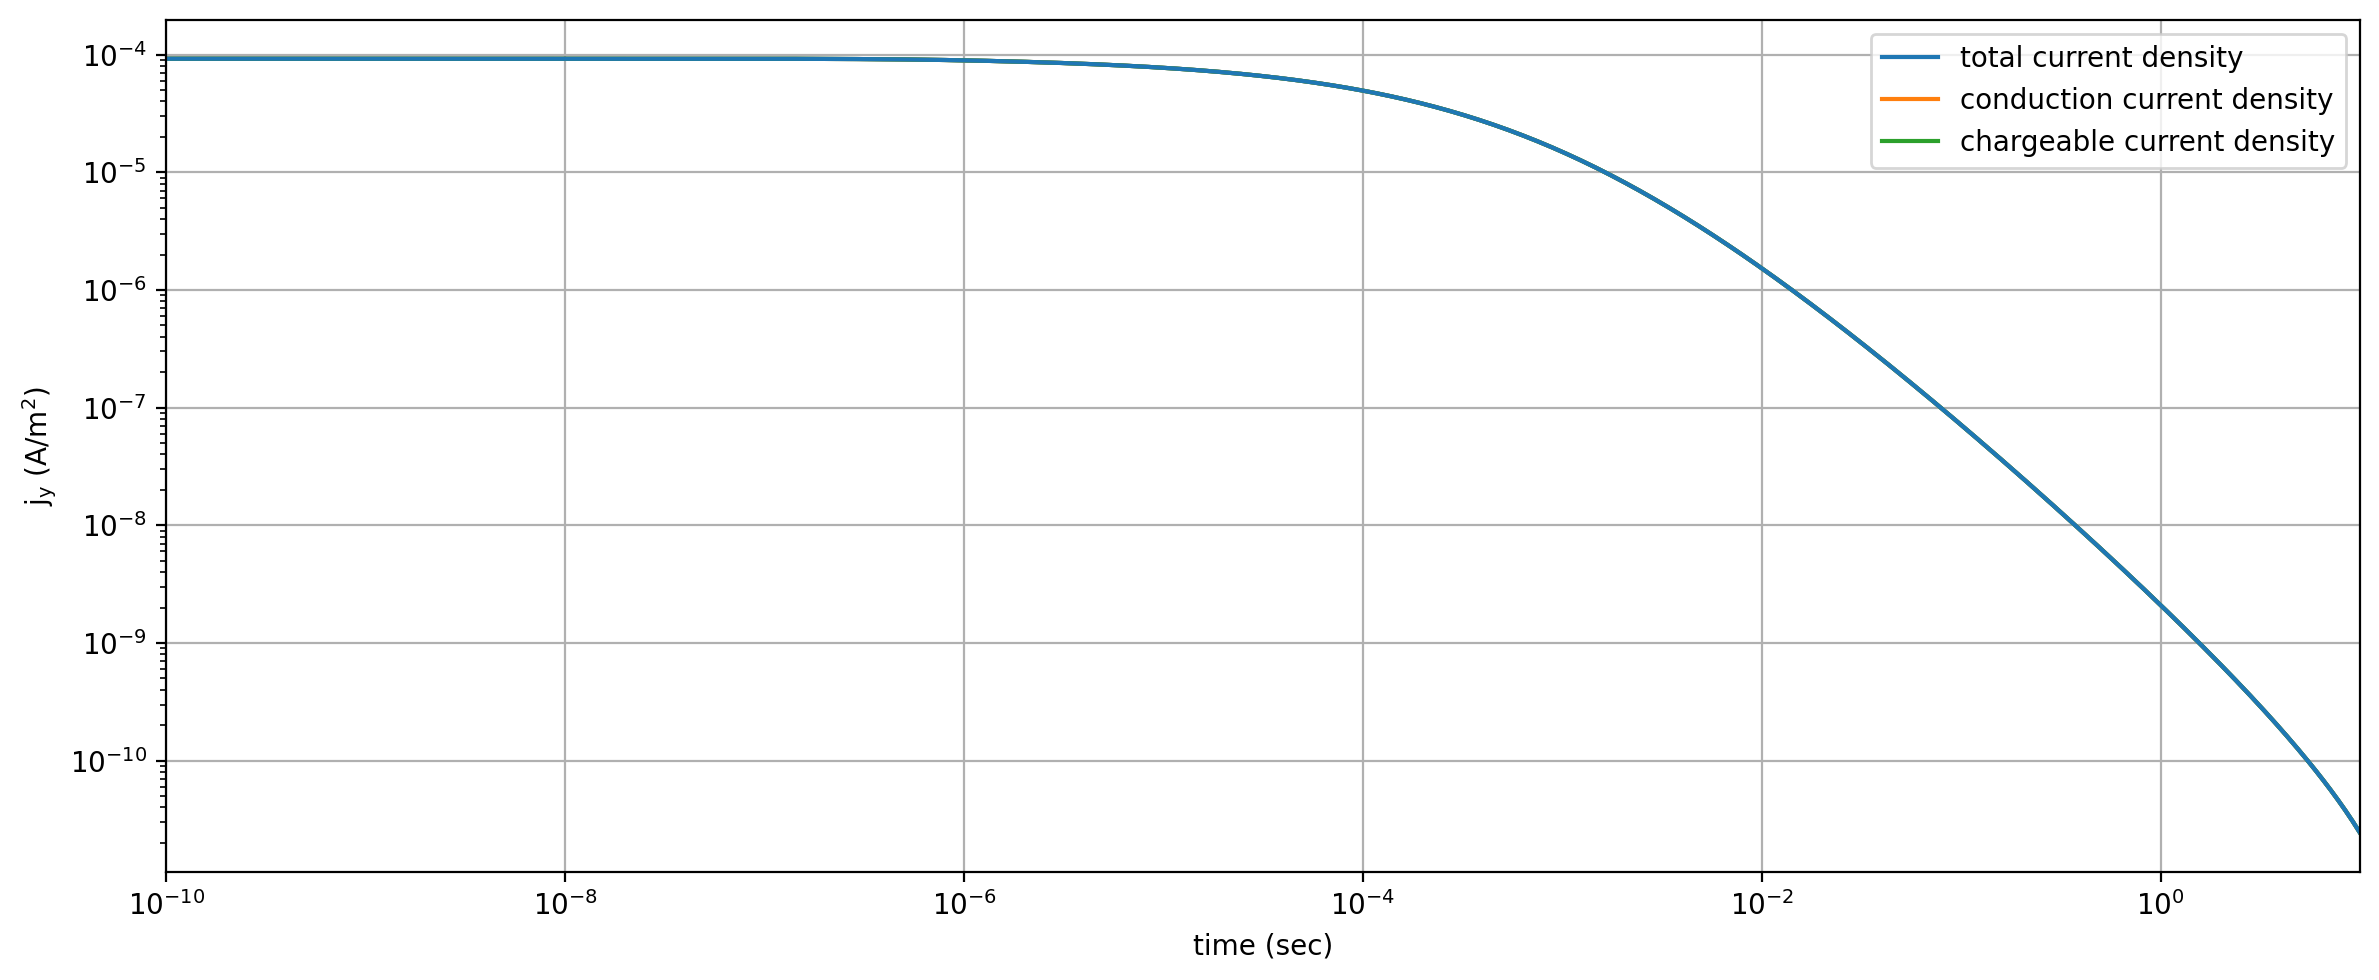

In [198]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)

ax.plot(time, JT, "C0-", label='total current density')
ax.plot(time, -JT, "C0--")
ax.plot(time, JEM, "C1-", label='conduction current density')
ax.plot(time, -JEM, "C1--")
ax.plot(time, JIP, "C2-", label='chargeable current density')
ax.plot(time, -JIP, "C2--")
ax.plot(time, JT, "C0-")
ax.plot(time, -JT, "C0--")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-10, 1e1])
#ax.ylim([1e-12, 1e-6])
ax.set_xlabel('time (sec)')
ax.set_ylabel('$\mathrm{j_y}$ (A/$\mathrm{m^2}$)')
ax.legend()
ax.grid()
plt.tight_layout()

plt.show()